# EDA work  
Some simple examples for EDA with python3.  



In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Iris dataset  
https://en.wikipedia.org/wiki/Iris_flower_data_set  


In [6]:
iris = pd.read_csv("/Users/dantohe/Development/Projects/Springboard/datasets/iris/iris.csv")

In [15]:
print(iris.shape)
print(iris.columns)
print(iris.head(5))
iris["species"].value_counts()

(150, 5)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

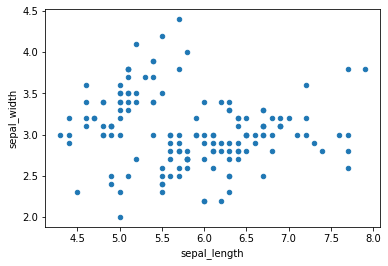

In [27]:
iris.plot(kind = "scatter", x="sepal_length", y ="sepal_width")
plt.show()

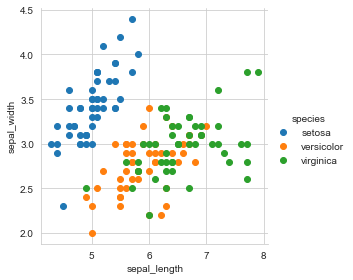

In [34]:
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue="species", height =4).map(plt.scatter,"sepal_length","sepal_width").add_legend()
plt.show()

## Pima Indians Diabetes Database
https://www.kaggle.com/uciml/pima-indians-diabetes-database?select=diabetes.csv  


In [16]:
pima = pd.read_csv("/Users/dantohe/Development/Projects/Springboard/datasets/Pima_Indians_Diabetes/diabetes.csv")

In [17]:
pima.shape

(768, 9)

In [25]:
print(pima.columns)
pima.head(3)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [24]:
pima["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

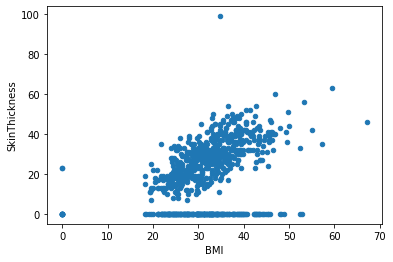

In [32]:
pima.plot(kind = "scatter", x="BMI", y ="SkinThickness")
plt.show()

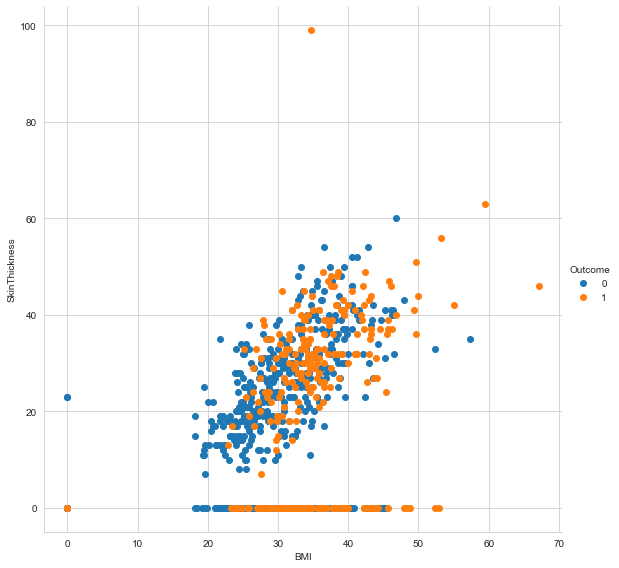

In [39]:
sns.set_style("whitegrid")
sns.FacetGrid(pima, hue="Outcome", height =8).map(plt.scatter,"BMI","SkinThickness").add_legend()
plt.show()

In [47]:
pima["SkinThickness"].value_counts()
pima_no_zero_skin_thckness = pima.loc[pima["SkinThickness"] != 0]
pima_no_zero_skin_thckness.shape


(541, 9)

In [48]:
pima_no_zero_skin_thckness["Outcome"].value_counts()

0    361
1    180
Name: Outcome, dtype: int64

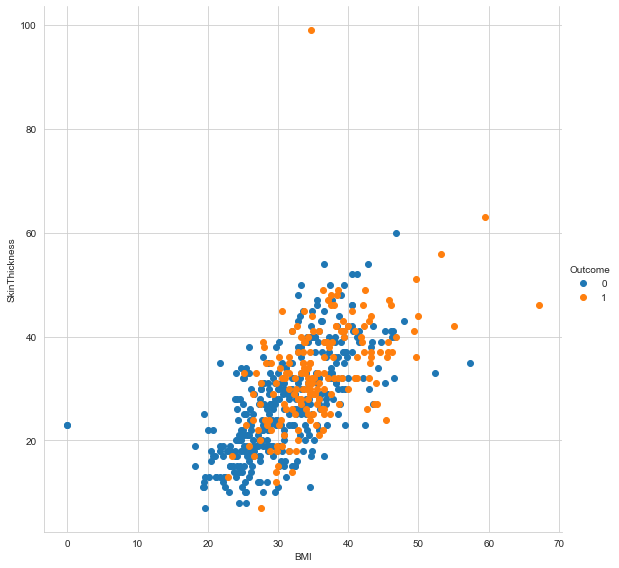

In [49]:
sns.set_style("whitegrid")
sns.FacetGrid(pima_no_zero_skin_thckness, hue="Outcome", height =8).map(plt.scatter,"BMI","SkinThickness").add_legend()
plt.show()

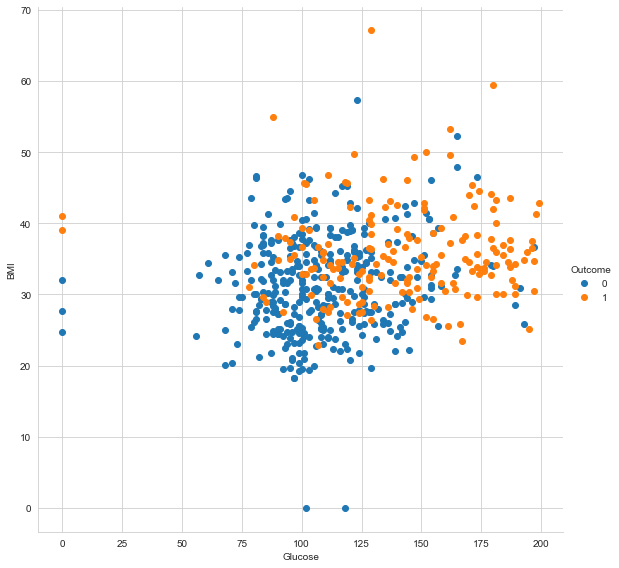

In [51]:
sns.set_style("whitegrid")
sns.FacetGrid(pima_no_zero_skin_thckness, hue="Outcome", height =8).map(plt.scatter,"Glucose","BMI").add_legend()
plt.show()

Following part credits to:  
https://www.kaggle.com/ozanbozyel/eda-prediction



In [59]:
pima_x= pima.drop(labels=['Outcome'],axis=1,inplace=False)     
pima_y=pima['Outcome']   

# print(pima.isnull().sum())
print('-'*30)

col = pima.columns

# a new object will be created with a copy of the calling object’s data and indices. 
# Modifications to the data or indices of the copy will not be reflected in the original object (see notes below).
diabetes_copy  = pima.copy(deep = True)

diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_copy[['Glucose','BloodPressure',
                                             'SkinThickness','Insulin',
                                             'BMI']].replace(0,np.NaN)

print(diabetes_copy.isna().sum())
print('-'*30)

------------------------------
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
------------------------------


<ipython-input-62-a3168ef9d2fe>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  diabetes_copy.hist(ax=ax)


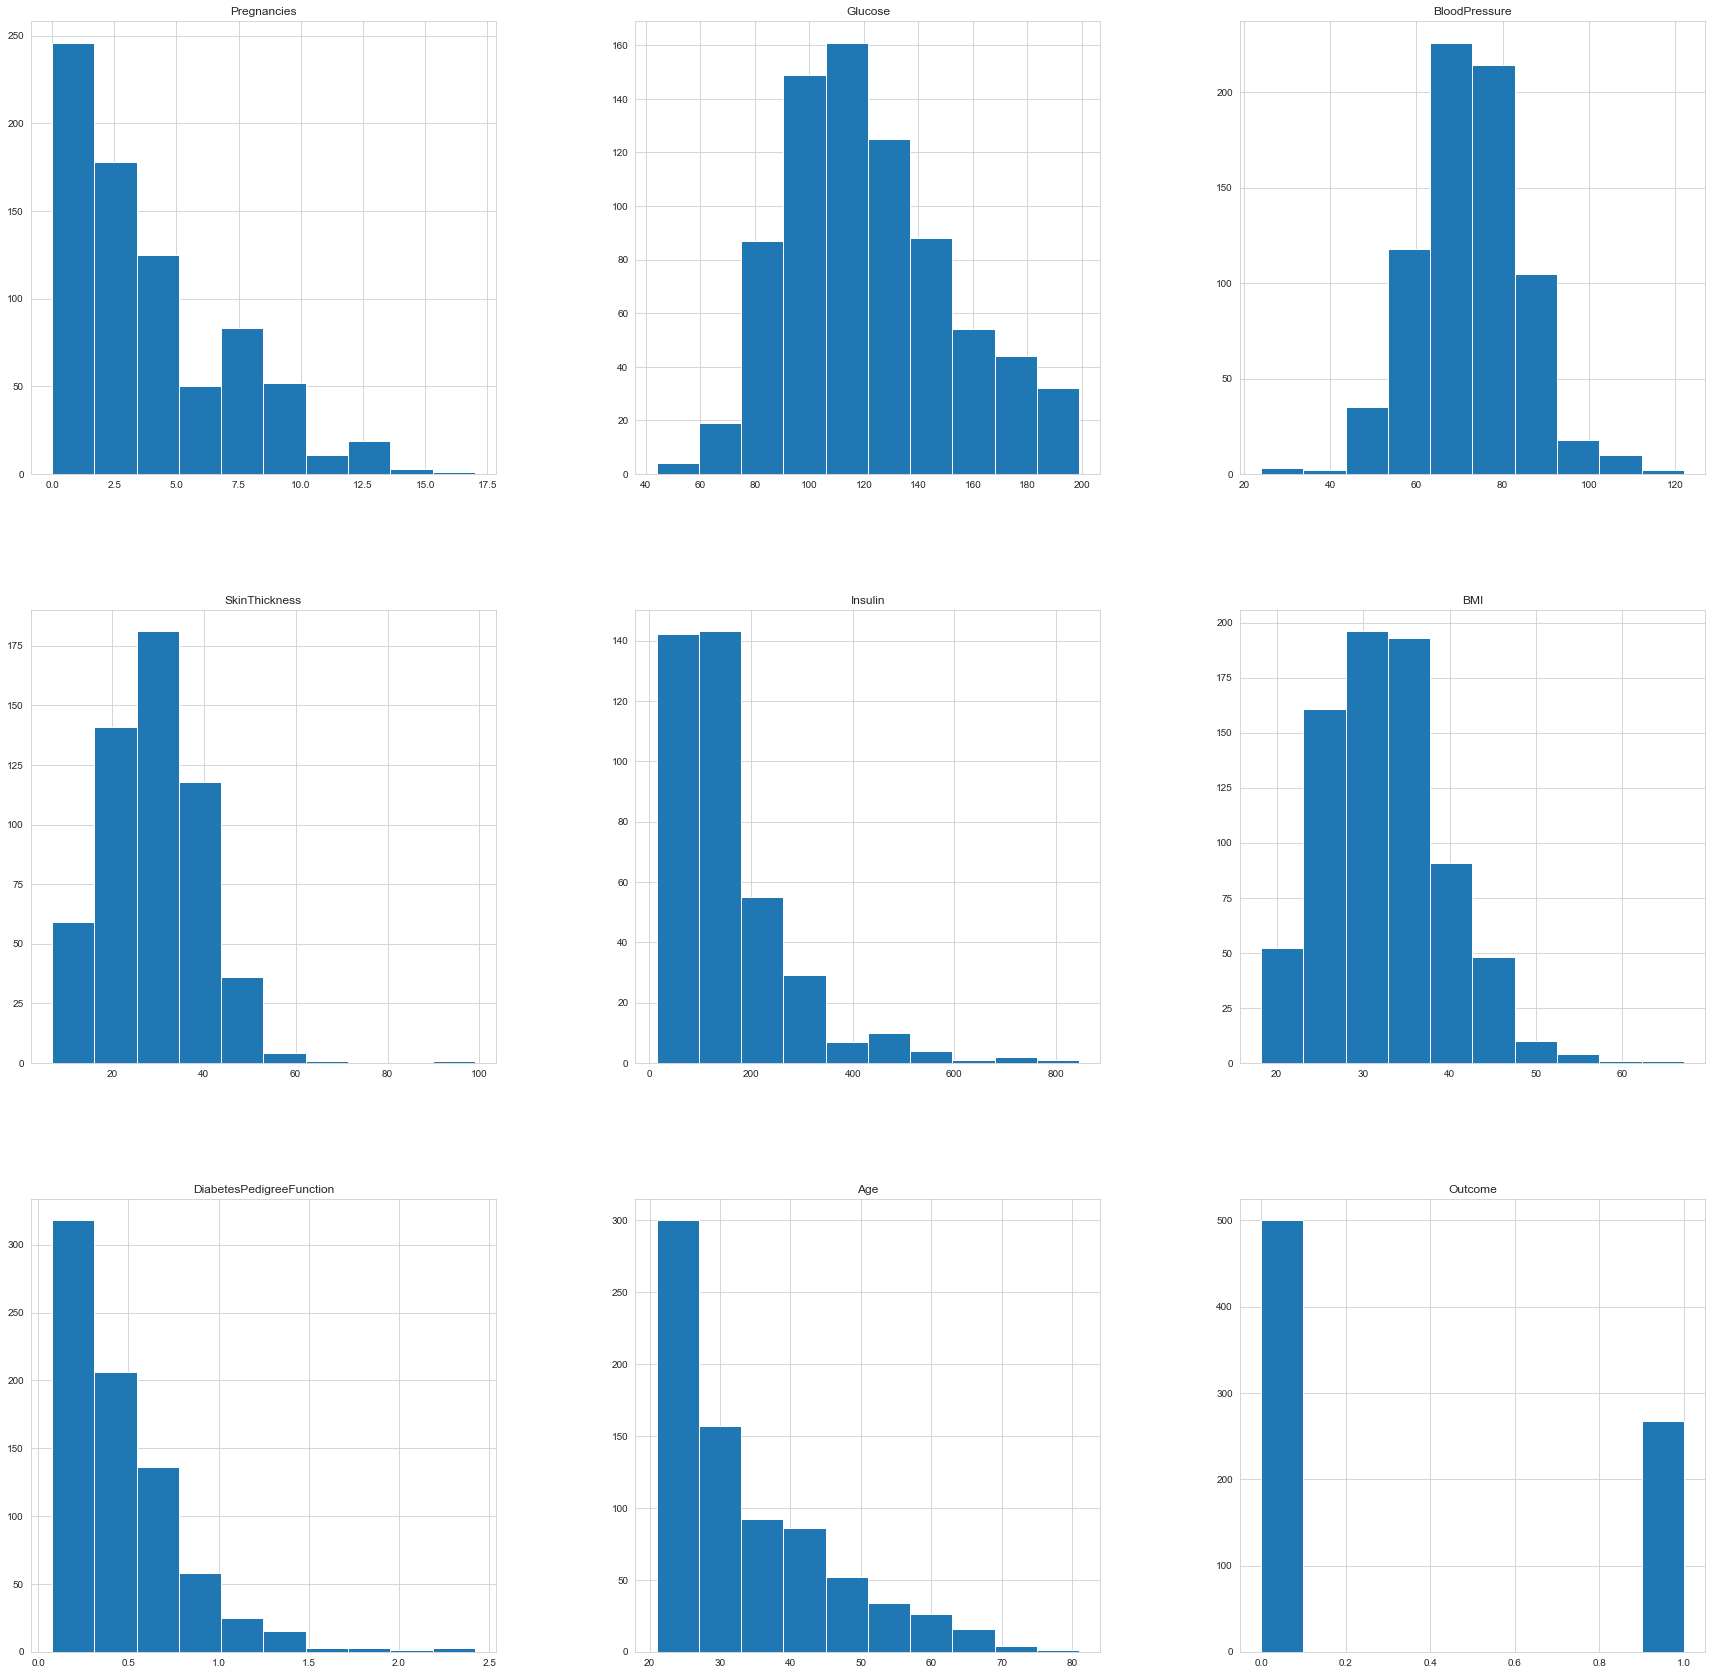

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(30, 30))
diabetes_copy.hist(ax=ax)
# diabetes_copy.hist(figsize=(25,25))
plt.show()

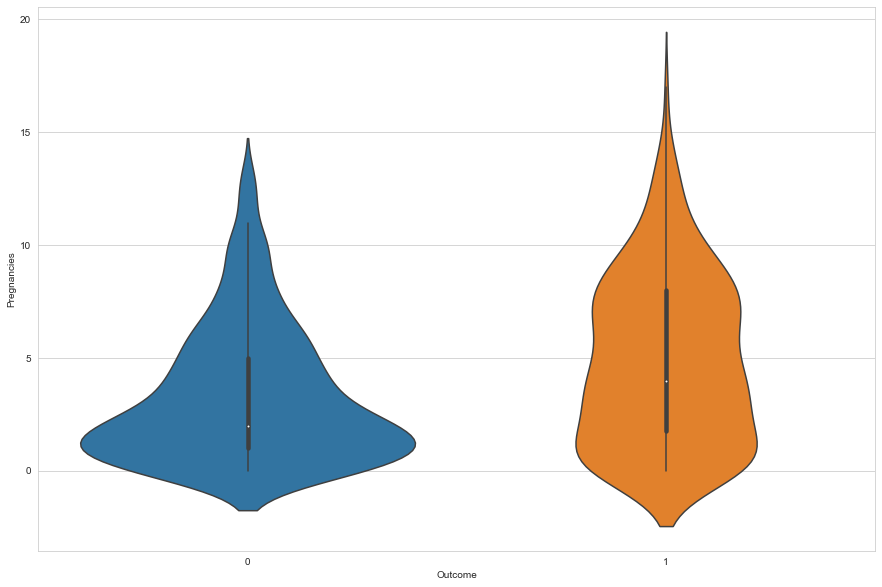

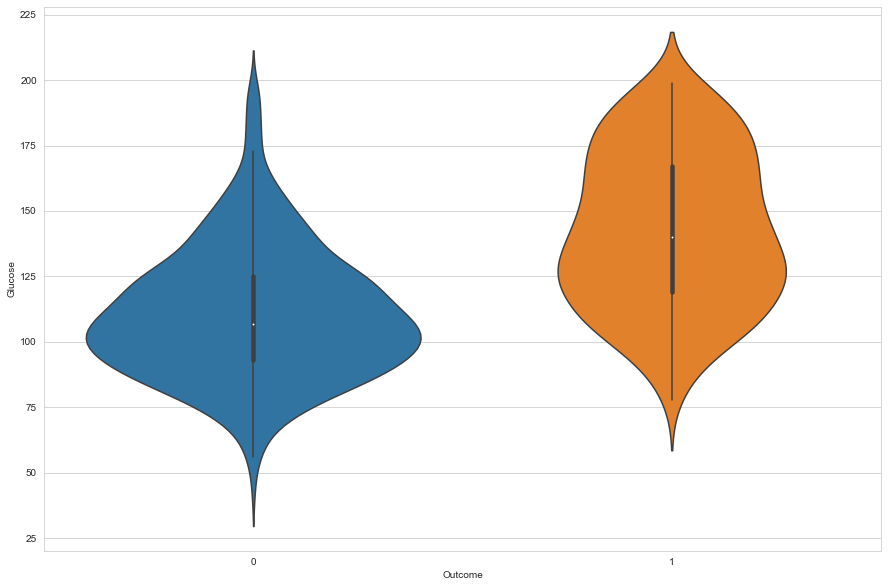

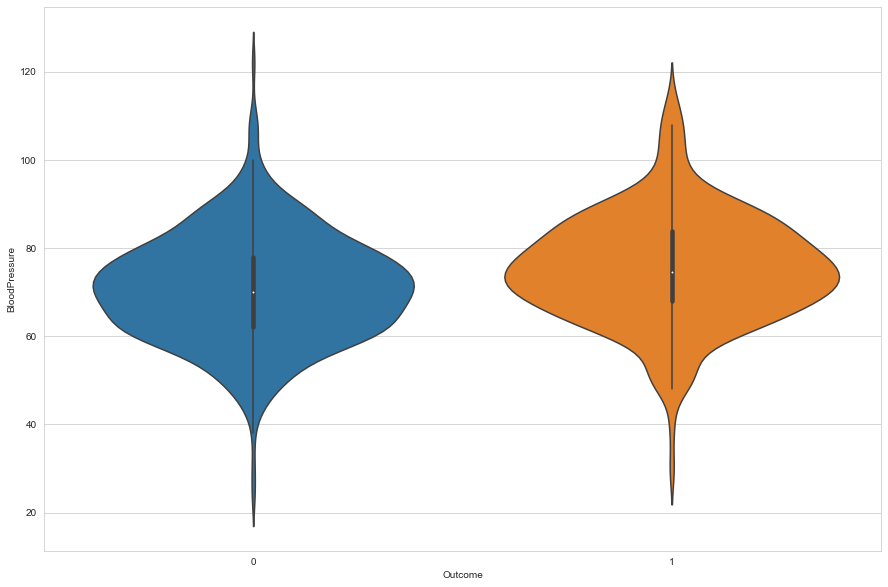

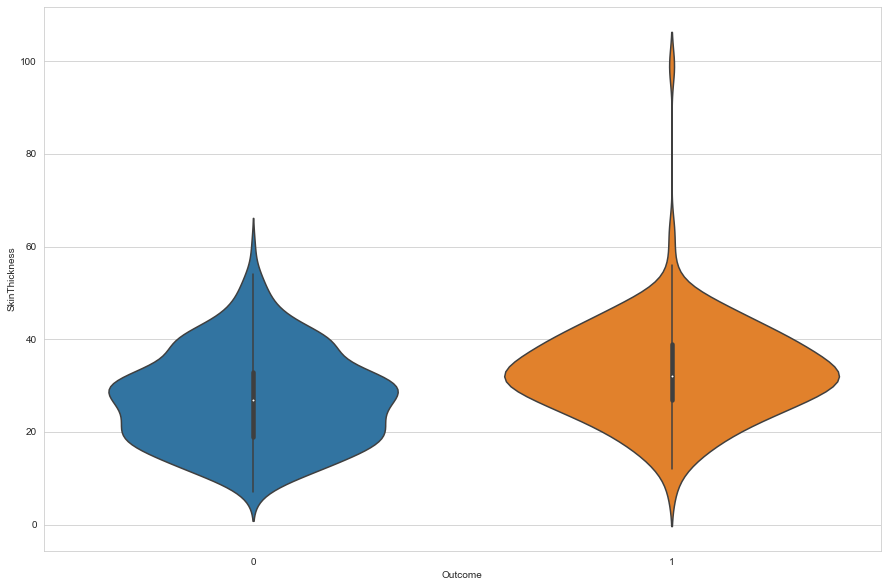

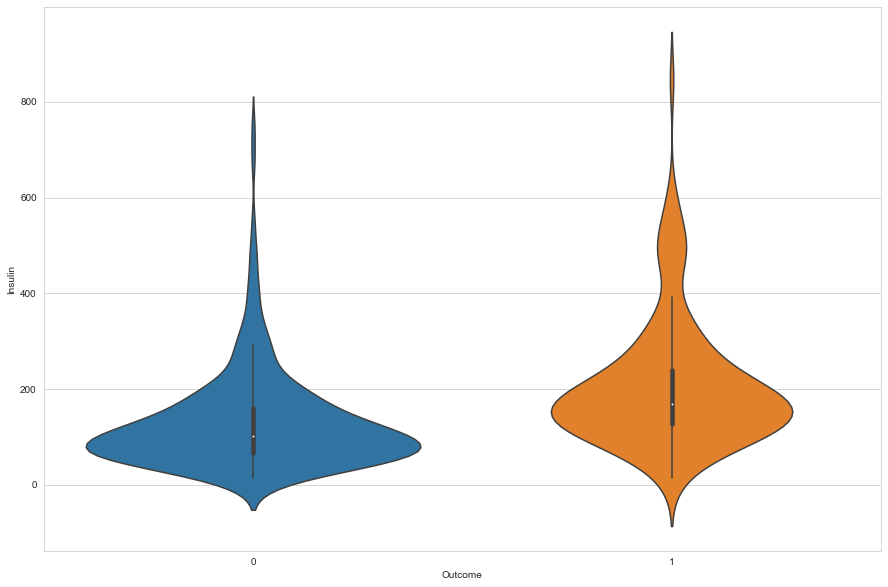

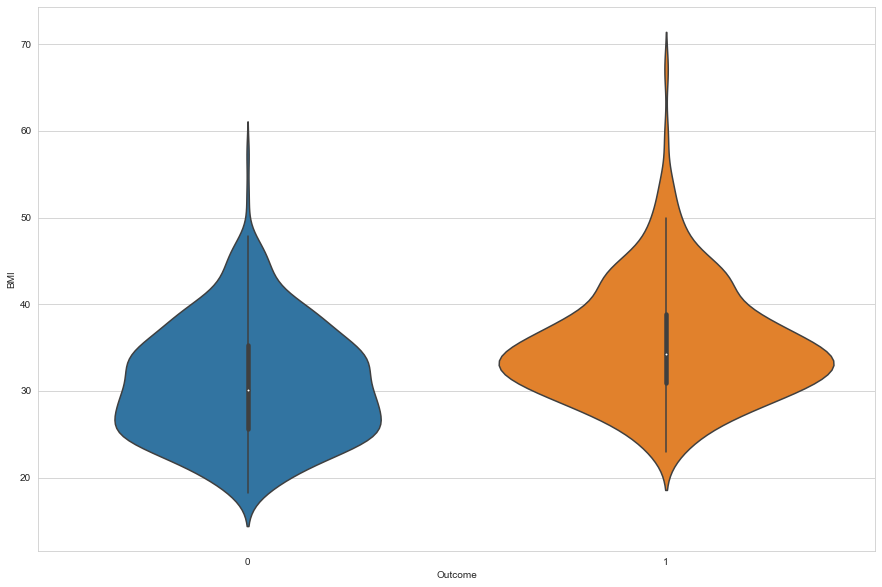

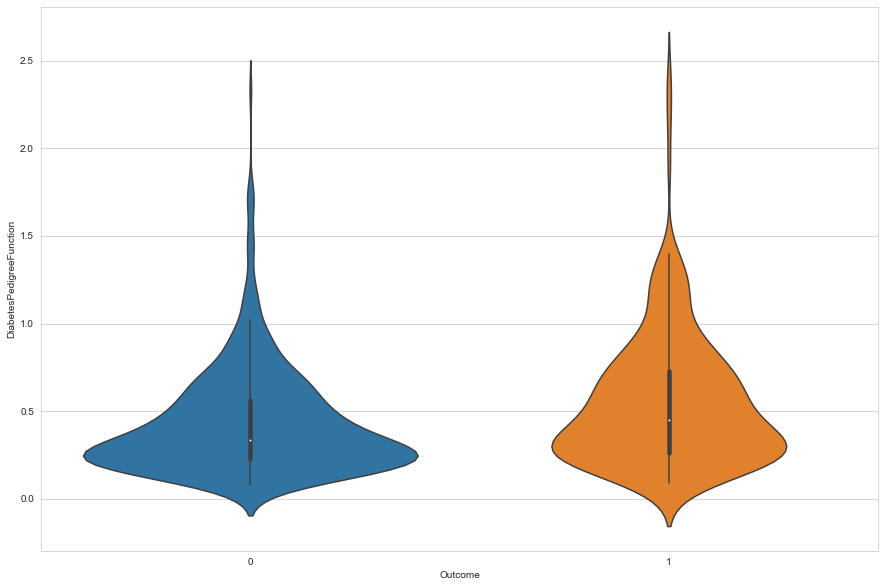

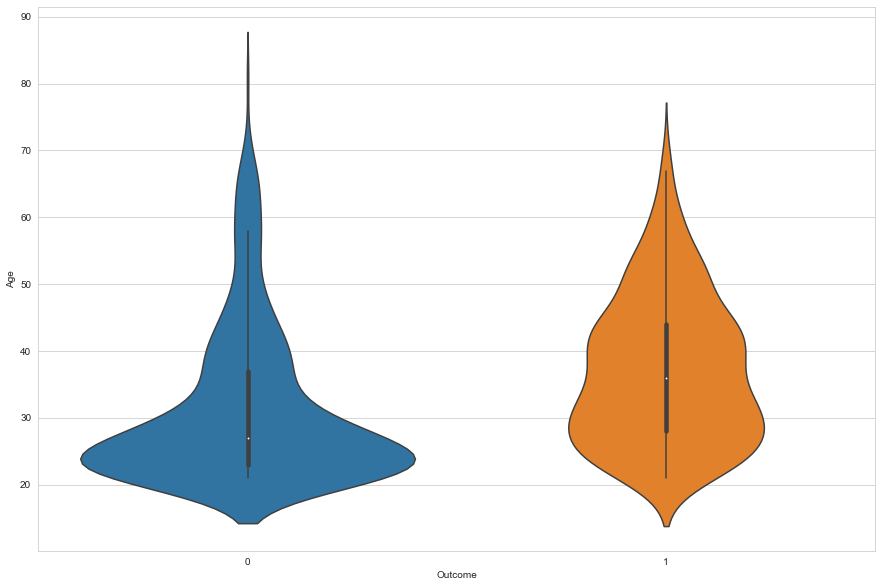

In [64]:
 violin_col = pima_x.columns
    
for i in violin_col:
    figure=plt.figure(figsize=(15,10))
    sns.violinplot(x='Outcome',y=i,data=diabetes_copy)
    plt.show()

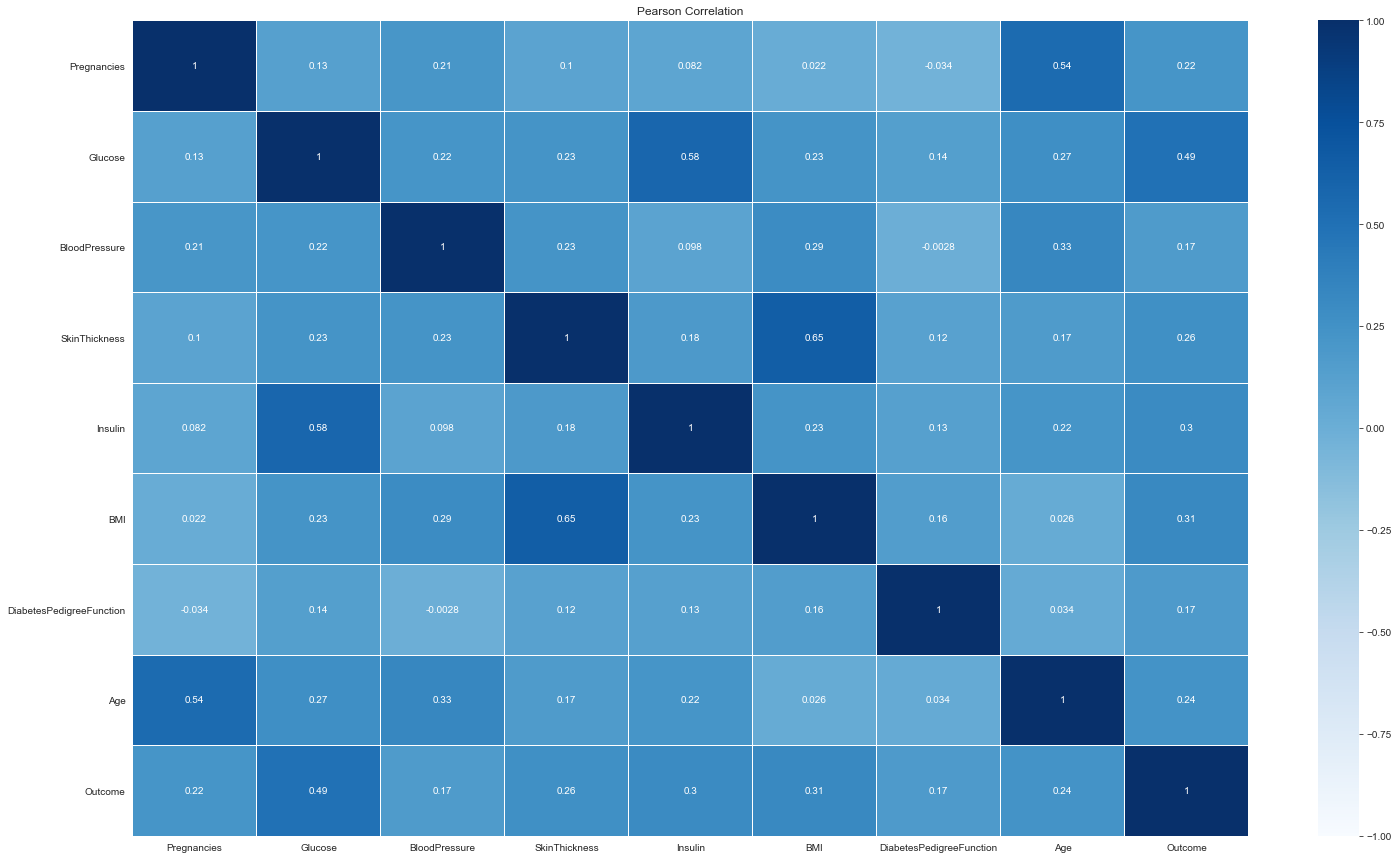

In [65]:
corr_Pearson = diabetes_copy.corr(method='pearson')

figure = plt.figure(figsize=(25,15))
sns.heatmap(corr_Pearson,vmin=-1,vmax=+1,cmap='Blues',annot=True, 
            linewidths=1,linecolor = 'white')
plt.title('Pearson Correlation')
plt.show()

In [69]:
pima_x= pima.drop(labels=['Outcome'],axis=1,inplace=False)

x_train, x_test, y_train, y_test = train_test_split(pima_x,pima_y,
                        test_size = 0.3, random_state = 44, shuffle = True)


Logistic_R = LogisticRegression(solver="liblinear").fit(x_train,y_train)
Decision_Tree = DecisionTreeClassifier(random_state=44).fit(x_train,
                                                            y_train)


Logistic_R_Pre = Logistic_R.predict(x_test)
logis_accuracy = accuracy_score(y_test,Logistic_R_Pre)

Decision_Tree_Pre = Decision_Tree.predict(x_test)
Tree_accuracy = accuracy_score(y_test,Decision_Tree_Pre)

print('Logistic Regression Model: ',round(logis_accuracy,2))
print('Decision Tree Model: ',round(Tree_accuracy,2))

Logistic Regression Model:  0.78
Decision Tree Model:  0.72
